In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches


In [40]:
df_before = pd.read_csv('first.csv')

In [20]:
df_after = df_before.replace({'-': np.nan,'No Value': np.nan}).copy()

In [21]:
index = df_after['Unnamed: 0'].tolist()
df_after.drop('Unnamed: 0',inplace=True,axis = 1)
df_after.index = index

In [22]:
hours = df_after.iloc[0,:].tolist()
for i in range (0,108) :
    if 0<i<12:
        df_after.rename(columns={df_after.columns[i] : df_after.columns[i][:len(df_after.columns[i])-2] + hours[i]},inplace=True) 
    elif i%12 == 0 :
        df_after.rename(columns={df_after.columns[i] : df_after.columns[i][:len(df_after.columns[i])] + hours[i]},inplace=True)
    else :
        df_after.rename(columns={df_after.columns[i] : df_after.columns[i][:len(df_after.columns[i])-2] + hours[i]},inplace=True)
df_after = df_after.drop(df_after.index[0])

In [23]:
for col in df_after.columns:
    df_after[col] = pd.to_numeric(df_after[col],downcast = 'float')
    df_after[col] = df_after[col].fillna(value = round(df_after[col].mean(),1))

In [24]:
df_final = df_after.iloc[:,:72].copy()

In [25]:
for i in range (0,72):
    if i%12<2 or i%12 > 9:
        df_final.drop(df_after.columns[i],inplace=True,axis = 1)

In [27]:
winter_wave_avg = spring_wave_avg = summer_wave_avg = fall_wave_avg = 0
for col in df_final.columns[24:32]:
    winter_wave_avg += df_final[col].iloc[297:389].mean()
    spring_wave_avg += df_final[col].iloc[389:480].mean()
    summer_wave_avg += df_final[col].iloc[115:205].mean()
    fall_wave_avg += df_final[col].iloc[205:297].mean()
winter_wave_avg = round(winter_wave_avg / 8 , 3)
spring_wave_avg = round (spring_wave_avg / 8 ,3)
summer_wave_avg = round(summer_wave_avg/ 8 ,3)
fall_wave_avg = round(fall_wave_avg / 8 ,3)

In [28]:
winter_period_avg = spring_period_avg = summer_period_avg = fall_period_avg = 0
for col in df_final.columns[40:49]:
    winter_period_avg += df_final[col].iloc[297:389].mean()
    spring_period_avg += df_final[col].iloc[389:480].mean()
    summer_period_avg += df_final[col].iloc[115:205].mean()
    fall_period_avg += df_final[col].iloc[205:297].mean()
winter_period_avg = round(winter_period_avg / 8)
spring_period_avg = round (spring_period_avg / 8)
summer_period_avg = round(summer_period_avg/ 8)
fall_period_avg = round(fall_period_avg / 8)

In [30]:
data = {'Season': ['Winter', 'Spring', 'Summer', 'Fall'], 
        'Wave Period': [winter_period_avg, spring_period_avg, summer_period_avg, fall_period_avg], 
        'Wave Height': [winter_wave_avg, spring_wave_avg, summer_wave_avg, fall_wave_avg]}
df_to_chart = pd.DataFrame(data)

Text(0, 0.5, 'Average')

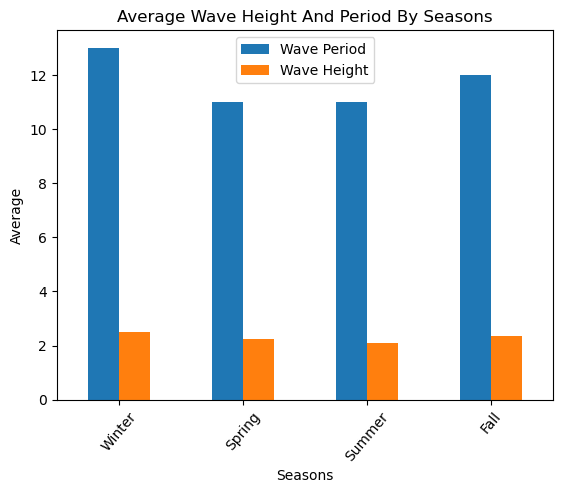

In [39]:
ax = df_to_chart.plot(kind='bar', x= 'Season', y=['Wave Period', 'Wave Height'], rot=50)
ax.set_title('Average Wave Height And Period By Seasons')
ax.set_xlabel('Seasons')
ax.set_ylabel('Average')

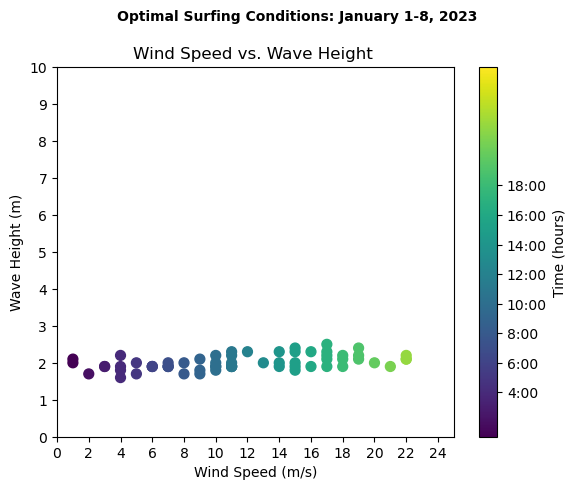

In [43]:
wind_speed = df_final.iloc[511:519, 0:8]
wave_height = df_final.iloc[511:519, 24:32]   
plt.scatter(wind_speed.values.flatten(), wave_height.values.flatten(), s=50, c=wind_speed.values.flatten(), cmap='viridis')
plt.xlim(0, 25)
plt.xticks(range(0, 26, 2))
plt.xlabel('Wind Speed (m/s)')
plt.ylim(0, 10)
plt.yticks(range(0, 11, 1))
plt.ylabel('Wave Height (m)')
ticks = np.arange(4, 20, 2)
plt.colorbar(label='Time (hours)', ticks=ticks, format="%d:00")   
plt.title('Wind Speed vs. Wave Height ')
plt.suptitle('Optimal Surfing Conditions: January 1-8, 2023', fontsize=10, fontweight='bold', y=1)
plt.show()

Text(0.5, 1, 'Worst Surfing Conditions: May 28 - June 3, 2022')

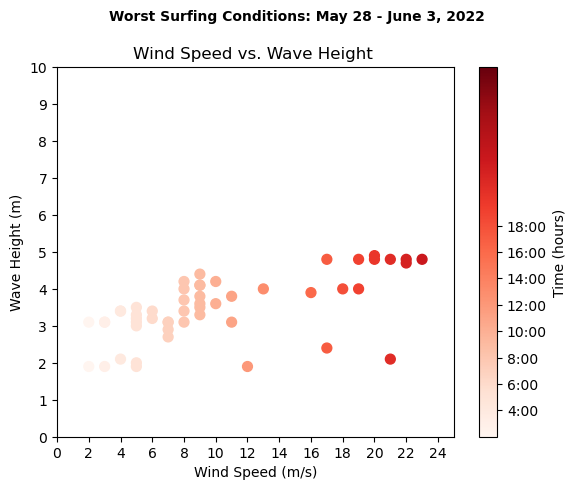

In [44]:
wind_speed = df_final.iloc[293:300, 0:8]
wave_height = df_final.iloc[293:300, 24:32] 
plt.scatter(wind_speed.values.flatten(), wave_height.values.flatten(), s=50, c=wind_speed.values.flatten(), cmap='Reds')
plt.xlim(0, 25)
plt.xticks(range(0, 26, 2))
plt.xlabel('Wind Speed (m/s)')
plt.ylim(0, 10)
plt.yticks(range(0, 11, 1))
plt.ylabel('Wave Height (m)')
ticks = np.arange(4, 20, 2)
plt.colorbar(label='Time (hours)', ticks=ticks, format="%d:00")
plt.title('Wind Speed vs. Wave Height ')
plt.suptitle('Worst Surfing Conditions: May 28 - June 3, 2022', fontsize=10, fontweight='bold', y=1)

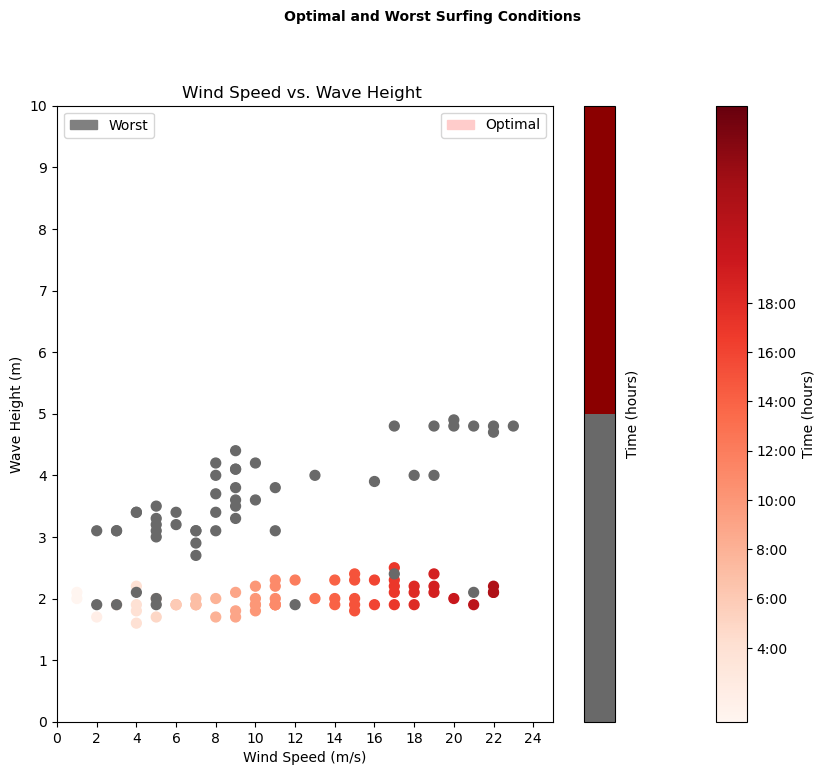

In [49]:
def wind_wave_plot(df):
    wind_speed = df.iloc[511:519, 0:8]
    wave_height = df.iloc[511:519, 24:32] 
    scatter = plt.scatter(wind_speed.values.flatten(), wave_height.values.flatten(), s=50, c=wind_speed.values.flatten(), cmap='Reds')
    plt.xlim(0, 25)
    plt.xticks(range(0, 26, 2))
    plt.xlabel('Wind Speed (m/s)')
    plt.ylim(0, 10)
    plt.yticks(range(0, 11, 1))
    plt.ylabel('Wave Height (m)')
    ticks = np.arange(4, 20, 2)
    plt.colorbar(label='Time (hours)', ticks=ticks, format="%d:00")
    plt.title('Wind Speed vs. Wave Height ')
    plt.suptitle('Optimal Surfing Conditions: January 1-8, 2023', fontsize=10, fontweight='bold', y=1)
    red_patch = mpatches.Patch(color='#FFCCCB', label='Optimal')
    plt.legend(handles=[red_patch],loc=1)
    first_legend = plt.legend(handles=[red_patch], loc=1)
    ax = plt.gca().add_artist(first_legend)


    

def wind_wave_plot_WorstCondtion(df):
    wind_speed = df.iloc[293:300, 0:8]
    wave_height = df.iloc[293:300, 24:32]
    colors = ['dimgray', 'darkred']
    cmap = ListedColormap(colors)
    plt.scatter(wind_speed.values.flatten(), wave_height.values.flatten(), s=50, c=np.ones_like(wind_speed.values.flatten()), cmap=cmap)
    plt.xlim(0, 25)
    plt.xticks(range(0, 26, 2))
    plt.xlabel('Wind Speed (m/s)')
    plt.ylim(0, 10)
    plt.yticks(range(0, 11, 1))
    plt.ylabel('Wave Height (m)')
    plt.title('Wind Speed vs. Wave Height ')
    plt.suptitle('Optimal and Worst Surfing Conditions', fontsize=10, fontweight='bold', y=1)
    ticks = np.arange(4, 20, 2)
    plt.colorbar(label='Time (hours)', ticks=ticks, format="%d:00")
    grey_patch = mpatches.Patch(color='grey', label='Worst')
    plt.legend(handles=[grey_patch],loc=2)
    
    
plt.figure(figsize=(10, 8))
wind_wave_plot(df_final)
wind_wave_plot_WorstCondtion(df_final)